Get the frames paths

In [1]:
import glob

In [2]:
images_paths = glob.glob("/root/data/pellet/frames/*.jpg")

Get the labels

In [3]:
import json
import os

In [4]:
with open("/root/data/pellet/labels/pellet_labels.json", "r") as f:
    annotations = json.load(f)

In [5]:
# quick code to make viz simpler
for an in annotations:
    an["local_path"] = os.path.join("/root/data/pellet/frames/", an["External ID"])

some metrics

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
widths = []
heights = []
for ann in annotations:
    for pellet in ann["Label"]["pellet"]:
        xs = [k["x"] for k in pellet["geometry"]]
        x1, x2 = np.min(xs), np.max(xs)
        ys = [k["y"] for k in pellet["geometry"]]
        y1, y2 = np.min(ys), np.max(ys)
        width = x2-x1
        height = y2-y1
        widths.append(width)
        heights.append(height)

322 2
14.0


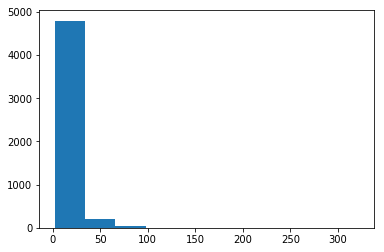

In [15]:
print(max(widths), min(widths))
print(np.median(widths))
plt.hist(widths)
plt.show()

258 2
14.0


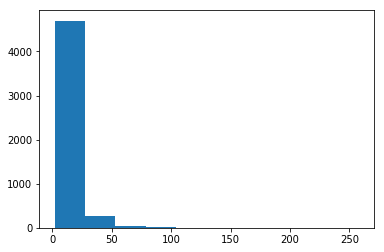

In [14]:
print(max(heights), min(heights))
print(np.median(heights))
plt.hist(heights)
plt.show()

some visualizations

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

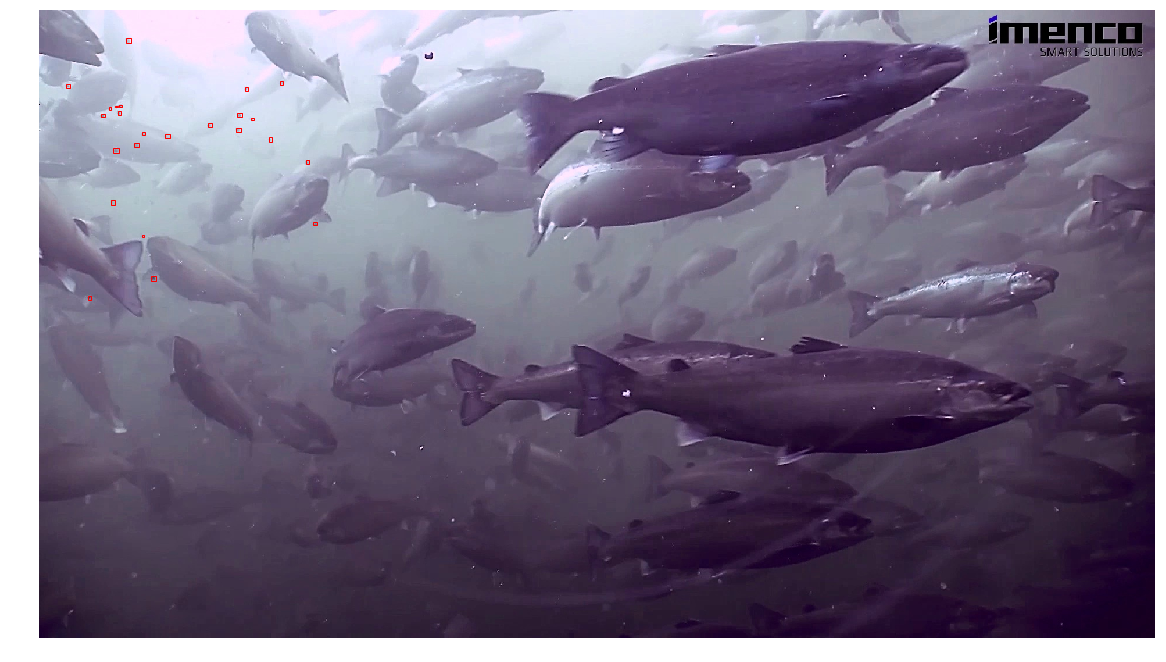

In [20]:
# random_ann = np.random.choice(annotations)
random_ann = [ann for ann in annotations if ann['External ID'] == 'Oppdrett_Demo_1080p_4120.jpg'][0]
image = cv2.imread(random_ann["local_path"])
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)
for pellet in random_ann["Label"]["pellet"]:
    xs = [k["x"] for k in pellet["geometry"]]
    x1, x2 = np.min(xs), np.max(xs)
    ys = [k["y"] for k in pellet["geometry"]]
    y1, y2 = np.min(ys), np.max(ys)
    width = x2-x1
    height = y2-y1
    # print(width, height)
    r = Rectangle((x1, y1), width, height, facecolor="none", edgecolor="r")
    ax.add_patch(r)
ax.axis("off")
plt.show()

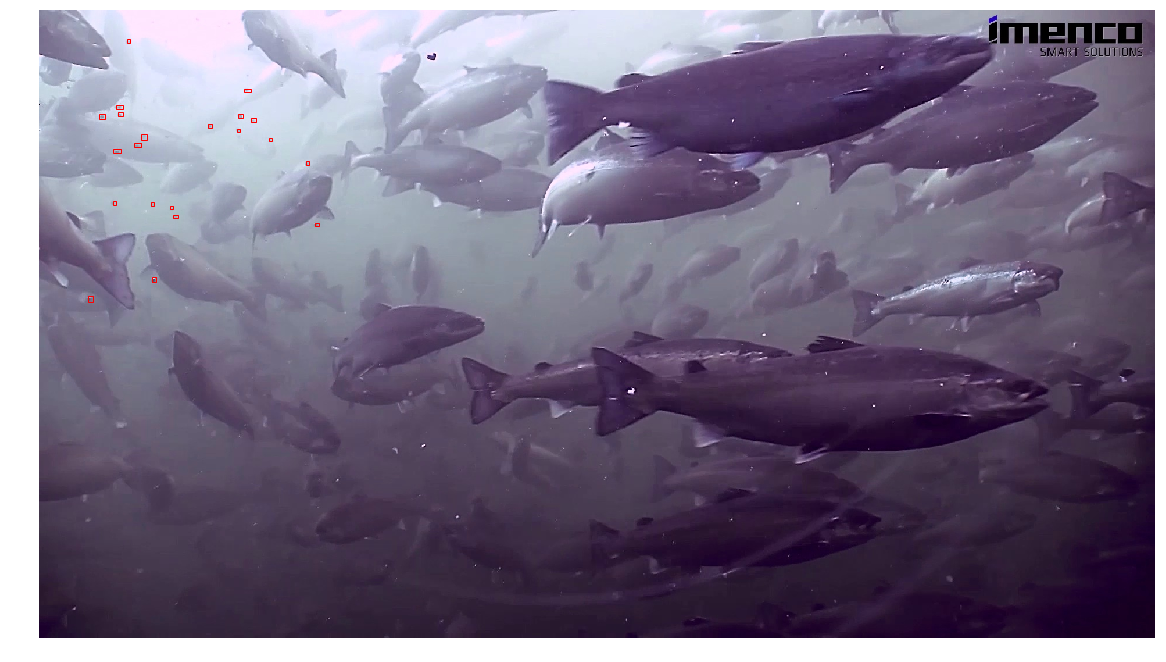

In [21]:
random_ann = [ann for ann in annotations if ann['External ID'] == 'Oppdrett_Demo_1080p_4121.jpg'][0]
image = cv2.imread(random_ann["local_path"])
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)
for pellet in random_ann["Label"]["pellet"]:
    xs = [k["x"] for k in pellet["geometry"]]
    x1, x2 = np.min(xs), np.max(xs)
    ys = [k["y"] for k in pellet["geometry"]]
    y1, y2 = np.min(ys), np.max(ys)
    width = x2-x1
    height = y2-y1
    # print(width, height)
    r = Rectangle((x1, y1), width, height, facecolor="none", edgecolor="r")
    ax.add_patch(r)
ax.axis("off")
plt.show()

create csv file

In [ ]:
import csv

In [ ]:
# one class: 0 = pellets
with open("/root/data/pellet/labels/pellet_labels.csv", mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for ann in annotations:
        for pellet in ann["Label"]["pellet"]:
            xs = [k["x"] for k in pellet["geometry"]]
            x1, x2 = np.min(xs), np.max(xs)
            ys = [k["y"] for k in pellet["geometry"]]
            y1, y2 = np.min(ys), np.max(ys)
            writer.writerow([ann["local_path"], x1, y1, x2, y2, "pellet"])


In [ ]:
# create classid file
with open("/root/data/pellet/labels/class_ids.csv", mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(["pellet", 0])